# Installing Qiskit

In [1]:
# !pip install qiskit qiskit_aer
# !pip install pylatexenc
# !pip install matplotlib

In [2]:
from qiskit import QuantumCircuit, transpile 
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import (
    NoiseModel,
    pauli_error
)
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

# Define the circuit

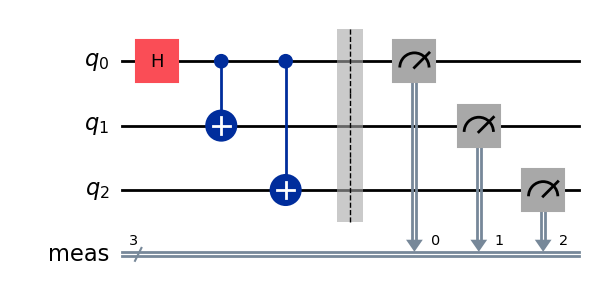

In [14]:
QUBITS = 3

qc = QuantumCircuit(QUBITS)
qc.h(0)
for i in range(1,QUBITS):
  qc.cx(0,i)

qc.measure_all()

qc.draw(output="mpl")

# Simulating the circuit

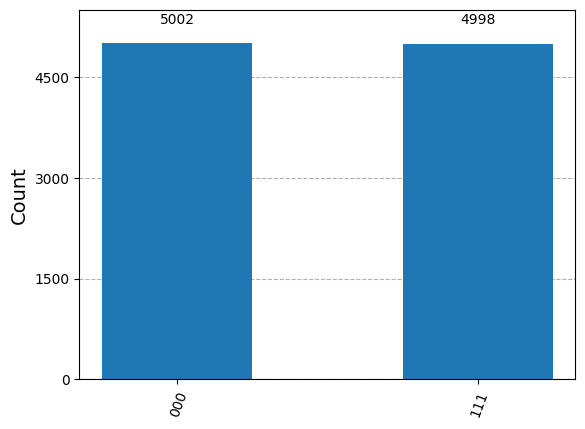

In [16]:
backend_sim = Aer.get_backend('aer_simulator')
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=10000)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
plot_histogram(counts)

# Defining the noise model

In [5]:
p_error = 0.5
error1 = pauli_error([("X", p_error), ("I", 1 - p_error)])
error2 = pauli_error([("Z", p_error), ("I", 1 - p_error)])
error3 = error1.compose(error2)
error4 = error3.tensor(error3)


noise_model = NoiseModel()
gates = noise_model.basis_gates
gates.remove("cx") # we first apply single qubit errors
noise_model.add_all_qubit_quantum_error(error3,gates)
noise_model.add_all_qubit_quantum_error(error4,["cx"])
print(NoiseModel)   

<class 'qiskit_aer.noise.noise_model.NoiseModel'>


# Simulating noisy circuit

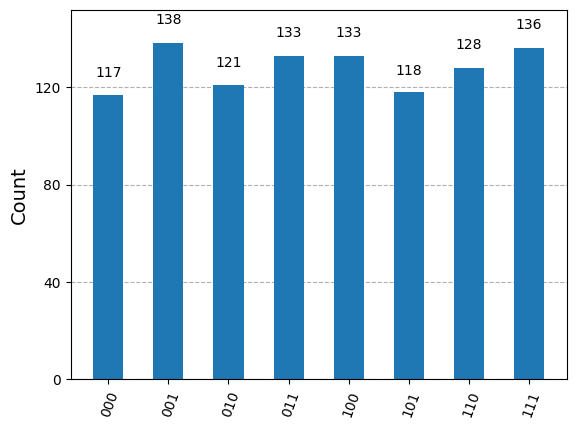

In [18]:
sim_noise = AerSimulator(noise_model=noise_model)

passmanager = generate_preset_pass_manager(
    optimization_level=3, backend=sim_noise
)
circ_tnoise = passmanager.run(qc)

result = sim_noise.run(circ_tnoise).result()
counts = result.get_counts(0)

plot_histogram(counts)

# Analyzing the Results

In this section, we can observe the impact of our noise model on the quantum circuit's behavior. The histogram shows how the noise affects the measurement outcomes compared to the ideal simulation we saw earlier. The presence of bit-flip (X) and phase-flip (Z) errors with a probability of 0.5 has significantly altered the distribution of results.


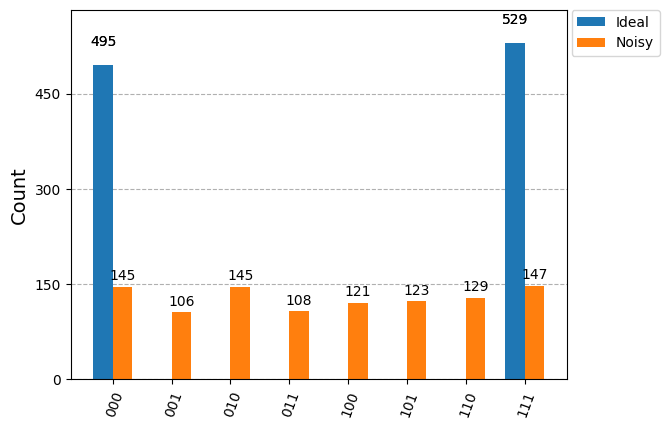

In [10]:
from qiskit.visualization import plot_histogram
from scipy.spatial.distance import jensenshannon

# Ideal simulation
ideal_backend = Aer.get_backend('qasm_simulator')
qc_transpiled = transpile(qc, ideal_backend)
job_ideal = ideal_backend.run(qc_transpiled, shots=1024)
ideal_result = job_ideal.result()
ideal_counts = ideal_result.get_counts()


def counts_to_probs(counts):
    total = sum(counts.values())
    probs = {k: v / total for k, v in counts.items()}
    return probs

ideal_probs = counts_to_probs(ideal_counts)
noisy_probs = counts_to_probs(counts)

all_keys = set(ideal_probs.keys()).union(noisy_probs.keys())
ideal_prob_list = [ideal_probs.get(k, 0) for k in all_keys]
noisy_prob_list = [noisy_probs.get(k, 0) for k in all_keys]


# Plotting the histograms
plot_histogram([ideal_counts, counts], legend=['Ideal', 'Noisy'])


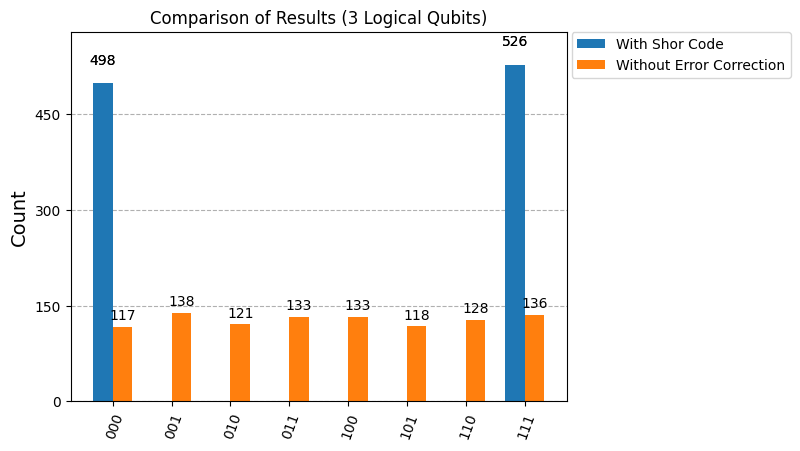

In [19]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def create_shor_code_circuit():
    q = QuantumRegister(27, 'q')  
    c = ClassicalRegister(3, 'c')  
    qc = QuantumCircuit(q, c)
    
    qc.h(q[0])
    qc.cx(q[0], q[9])  
    qc.cx(q[0], q[18]) 
    
    qc.cx(q[0], q[3])
    qc.cx(q[0], q[6])
    qc.h(q[0])
    qc.h(q[3])
    qc.h(q[6])
    qc.cx(q[0], q[1])
    qc.cx(q[0], q[2])
    qc.cx(q[3], q[4])
    qc.cx(q[3], q[5])
    qc.cx(q[6], q[7])
    qc.cx(q[6], q[8])
    
    qc.cx(q[9], q[12])
    qc.cx(q[9], q[15])
    qc.h(q[9])
    qc.h(q[12])
    qc.h(q[15])
    qc.cx(q[9], q[10])
    qc.cx(q[9], q[11])
    qc.cx(q[12], q[13])
    qc.cx(q[12], q[14])
    qc.cx(q[15], q[16])
    qc.cx(q[15], q[17])
    
    qc.cx(q[18], q[21])
    qc.cx(q[18], q[24])
    qc.h(q[18])
    qc.h(q[21])
    qc.h(q[24])
    qc.cx(q[18], q[19])
    qc.cx(q[18], q[20])
    qc.cx(q[21], q[22])
    qc.cx(q[21], q[23])
    qc.cx(q[24], q[25])
    qc.cx(q[24], q[26])
    
    qc.x(q[1])
    qc.z(q[12])
    qc.x(q[24])
    
    for i in [0, 3, 6]:
        qc.cx(q[i], q[i+1])
        qc.cx(q[i], q[i+2])
        qc.ccx(q[i+1], q[i+2], q[i])
    
    qc.h(q[0])
    qc.h(q[3])
    qc.h(q[6])
    qc.cx(q[0], q[3])
    qc.cx(q[0], q[6])
    qc.ccx(q[3], q[6], q[0])
    
    for i in [9, 12, 15]:
        qc.cx(q[i], q[i+1])
        qc.cx(q[i], q[i+2])
        qc.ccx(q[i+1], q[i+2], q[i])
    
    qc.h(q[9])
    qc.h(q[12])
    qc.h(q[15])
    qc.cx(q[9], q[12])
    qc.cx(q[9], q[15])
    qc.ccx(q[12], q[15], q[9])
    
    for i in [18, 21, 24]:
        qc.cx(q[i], q[i+1])
        qc.cx(q[i], q[i+2])
        qc.ccx(q[i+1], q[i+2], q[i])
    
    qc.h(q[18])
    qc.h(q[21])
    qc.h(q[24])
    qc.cx(q[18], q[21])
    qc.cx(q[18], q[24])
    qc.ccx(q[21], q[24], q[18])
    
    qc.measure(q[0], c[0])
    qc.measure(q[9], c[1])
    qc.measure(q[18], c[2])
    
    return qc

shor_circuit = create_shor_code_circuit()
transpiled_shor = transpile(shor_circuit, ideal_backend)
job_shor = ideal_backend.run(transpiled_shor, shots=1024)
shor_results = job_shor.result()
shor_counts = shor_results.get_counts()

plot_histogram(shor_counts, title="Results with Shor Code Error Correction (3 Logical Qubits)")

plot_histogram([shor_counts, counts], 
              legend=['With Shor Code', 'Without Error Correction'],
              title="Comparison of Results (3 Logical Qubits)")
